In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as img
##get file name
cwd = os.getcwd()
print(cwd)
filename = os.path.split(os.path.split(cwd)[1])[1]
filename
os.listdir(cwd)
root = cwd

C:\Users\Michael Wu\1-2ndJunior\Research\Chu Ma Research\2-D\img2bin\Mnist_32_32_4.0


In [2]:
size_name = 'size_0.03m_inter_0.125λ_dis_0.15m_feq_200000hz_water'

In [3]:
list_file = []
for file in os.listdir(cwd):
    if size_name in file :
        list_file.append(file)
        print(file)
file_list = list_file
print(file_list)

size_0.03m_inter_0.125λ_dis_0.15m_feq_200000hz_water
['size_0.03m_inter_0.125λ_dis_0.15m_feq_200000hz_water']


In [4]:
path_parent = os.path.join(root,file_list[0])
print(path_parent)

C:\Users\Michael Wu\1-2ndJunior\Research\Chu Ma Research\2-D\img2bin\Mnist_32_32_4.0\size_0.03m_inter_0.125λ_dis_0.15m_feq_200000hz_water


In [5]:
path_parent = os.path.join(root,file_list[0])
print(path_parent)
one_nine = os.listdir(path_parent)
print(one_nine)
path_one_nine_test_list = []
path_one_nine_train_list = []
for i in one_nine:
    path_num = os.path.join(path_parent,i)
   # print(path_num)
    path_num_test = os.path.join(path_num,os.listdir(path_num)[0]) 
    path_num_train = os.path.join(path_num,os.listdir(path_num)[1])
#     print(path_num_test)
#     print(path_num_train)
   
    path_one_nine_test_list.append(path_num_test)
    path_one_nine_train_list.append(path_num_train)
print(path_one_nine_test_list[0])
print(path_one_nine_train_list[0])

C:\Users\Michael Wu\1-2ndJunior\Research\Chu Ma Research\2-D\img2bin\Mnist_32_32_4.0\size_0.03m_inter_0.125λ_dis_0.15m_feq_200000hz_water
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
C:\Users\Michael Wu\1-2ndJunior\Research\Chu Ma Research\2-D\img2bin\Mnist_32_32_4.0\size_0.03m_inter_0.125λ_dis_0.15m_feq_200000hz_water\0\test_0
C:\Users\Michael Wu\1-2ndJunior\Research\Chu Ma Research\2-D\img2bin\Mnist_32_32_4.0\size_0.03m_inter_0.125λ_dis_0.15m_feq_200000hz_water\0\train_0


In [6]:
## TEST INPUTS
test_inputs = []
for i in path_one_nine_test_list:
    files = sorted(os.listdir(i))
    for e in files:
        image_name = os.path.join(i,e)
        image = img.imread(image_name)
        test_inputs.append(image)
test_inputs = np.array(test_inputs)
test_inputs_np = np.reshape(np.array(test_inputs),(5000,32,32))
np.save(size_name+'_Test_inputs',test_inputs_np)

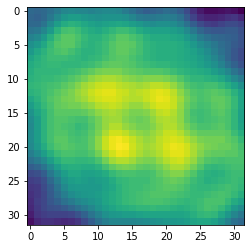

In [7]:
import matplotlib.pyplot as plt
plt.imshow(test_inputs_np[0])

In [8]:
train_inputs = []
count=0
for i in path_one_nine_train_list:
    files = sorted(os.listdir(i))
    for e in files:
        
        if(count==505):
            print(e)
        image_name = os.path.join(i,e)
        image = img.imread(image_name)
        train_inputs.append(image)
        count+=1
train_inputs = np.array(train_inputs)
train_inputs_np = np.reshape(np.array(train_inputs),(5000,32,32))
np.save(size_name+'_Train_inputs',train_inputs_np)

1_102.png


## npy to pkl

In [9]:
import numpy as np
TRAIN_inputs = np.load(size_name+"_Train_inputs.npy")
TRAIN_targets = np.load("Train_labels.npy")
TRAIN_data_dict = {
    "inputs":TRAIN_inputs,
    "targets":TRAIN_targets,
    "classes":None
}

In [10]:
TEST_inputs = np.load(size_name+"_Test_inputs.npy")
TEST_targets = np.load("Test_labels.npy")
TEST_data_dict = {
    "inputs":TEST_inputs,
    "targets":TEST_targets,
    "classes":None
}
import pickle
TEST_output = open('test_data.pkl', 'wb')
pickle.dump(TEST_data_dict, TEST_output)
TEST_output.close()
TRAIN_output = open('train_data.pkl', 'wb')
pickle.dump(TRAIN_data_dict, TRAIN_output)
TRAIN_output.close()